In [8]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import joblib


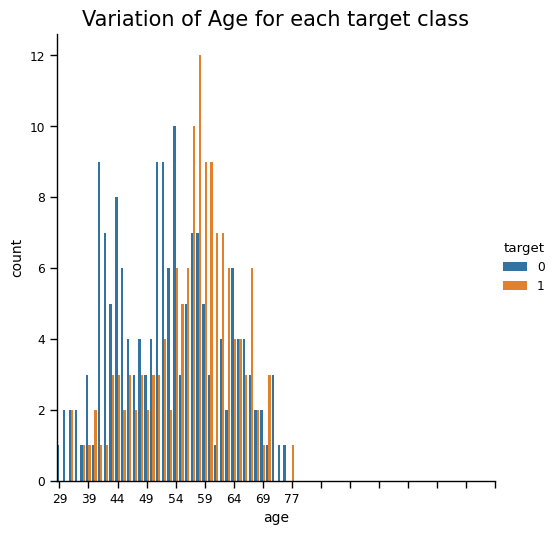

In [9]:
df = pd.read_csv('../data/cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

sns.set_context("paper", font_scale=1, rc = {"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data = df, x = 'age', hue='target', order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

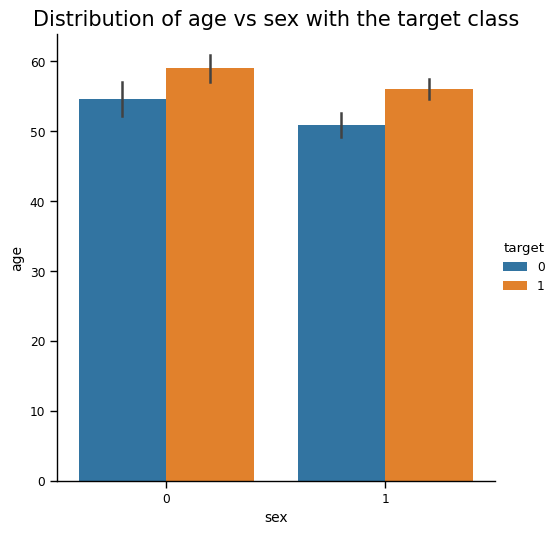

In [10]:
sns.catplot(kind='bar', data=df, y = 'age', x = 'sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Không dùng .values để giữ DataFrame
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale xong vẫn giữ DataFrame + tên cột
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)


In [12]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

classifier = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski'
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassiier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_knn.pkl")


Accuracy for training set for KNeighborsClassiier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.61


['heart_model_knn.pkl']

In [13]:
### SVM 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

classifier = SVC(kernel='rbf', random_state=4, probability=True)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_svm.pkl")


Accuracy for training set for SVC = 0.67
Accuracy for test set for SVC = 0.67


['heart_model_svm.pkl']

In [14]:
### Naive Bayes 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for GaussianNB = {}".format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_naive_bayes.pkl")


Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.85


['heart_model_naive_bayes.pkl']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_decision_tree.pkl")


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.77


['heart_model_decision_tree.pkl']

In [16]:
# Random Forest 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(
    criterion='gini', 
    max_depth=5, 
    min_samples_split=10,
    min_samples_leaf=5, 
    n_estimators=100, 
    random_state=42
)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_random_forest.pkl")


Accuracy for training set for RandomForestClassifier = 0.9
Accuracy for test set for RandomForestClassifier = 0.84


['heart_model_random_forest.pkl']

In [17]:
# Adaboost 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, 
    random_state=42
)

base_est = DecisionTreeClassifier(max_depth=2, class_weight='balanced')
classifier = AdaBoostClassifier(
    estimator=base_est,
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClasifier = {}'.format(accuracy_for_test))


joblib.dump(classifier, "heart_model_adaboost.pkl")


Accuracy for training set for AdaBoostClassifier = 0.9
Accuracy for test set for AdaBoostClasifier = 0.82


['heart_model_adaboost.pkl']

In [18]:
# GradientBoost
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

classifier = GradientBoostingClassifier(
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=0.8, 
    min_samples_split=5, 
    max_depth=4, 
    random_state=42
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))

joblib.dump(classifier, "heart_model_gradientboost.pkl")


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.82


['heart_model_gradientboost.pkl']

In [19]:
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

xg = XGBClassifier(
    objective="binary:logistic",
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # tính kỹ nếu dữ liệu mất cân bằng
    eval_metric='auc',
    random_state=42,
    use_label_encoder=False
)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = xg.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

joblib.dump(xg, "heart_model_xgboost.pkl")


Accuracy for training set for XGBClassifier = 0.97
Accuracy for test set for XGBClassifier = 0.87


c:\Users\AMIN\anaconda3\envs\torchenv310\lib\site-packages\xgboost\training.py:183: UserWarning: [02:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['heart_model_xgboost.pkl']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import numpy as np
import joblib

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Tạo các mô hình base learner
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
gc = GradientBoostingClassifier(random_state=42)
svc = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))
ad = AdaBoostClassifier(random_state=42)


clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Stacking model
classifier = StackingClassifier(
    estimators=clf,
    final_estimator=xg,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Huấn luyện
classifier.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
print("Train Accuracy:", np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2))
print("Test Accuracy :", np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2))
print("\nClassification report:\n", classification_report(y_test, y_pred))


joblib.dump(classifier, "heart_model_stacking.pkl")



Train Accuracy: 0.85
Test Accuracy : 0.8

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.83      0.80        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



c:\Users\AMIN\anaconda3\envs\torchenv310\lib\site-packages\xgboost\training.py:183: UserWarning: [02:08:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['heart_model_stacking.pkl']

### Feature

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25
)


clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)

C:\Users\AMIN\AppData\Local\Temp\ipykernel_22628\209519711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted_importances, y = sorted_feature_names, palette="hsv")


<Axes: >

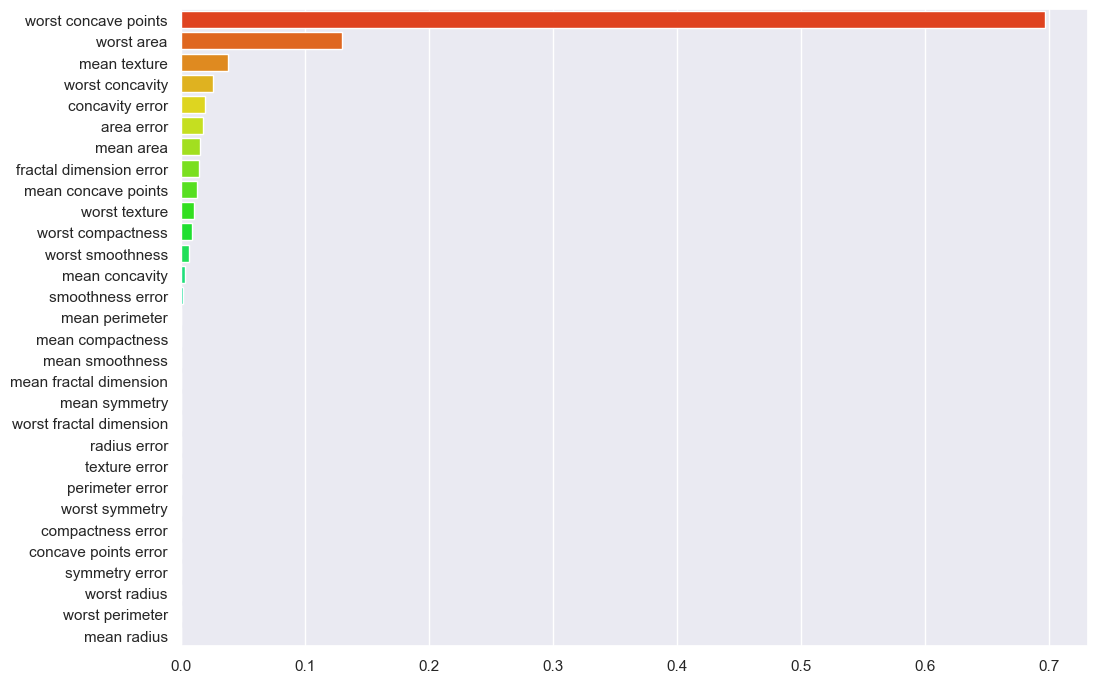

In [22]:
feature_importances = clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = dataset.feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = sorted_importances, y = sorted_feature_names, palette="hsv")
